# Sentiment Analysis on IMDB Movie reviews

## 1. Import library

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load data

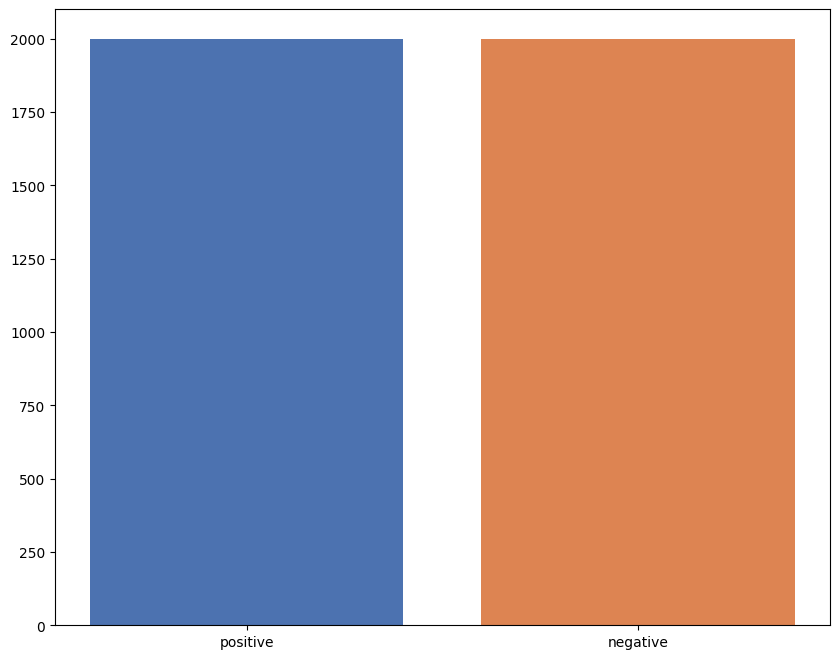

In [10]:
df_review= pd.read_csv('dataset.csv')
df_review_imb = pd.concat ([df_review[df_review['sentiment'] == 'positive'][:2000], df_review[df_review['sentiment'] == 'negative'][:2000]])
# df_review_imb = pd.read_csv('dataset.csv')
df_review_imb.head()

colors = sns.color_palette('deep')


plt.figure(figsize=(10, 8))
plt.bar(x=['positive', 'negative'], height=df_review_imb['sentiment'].value_counts(), color=colors[:2])
plt.show()

## 3. Split data into train and test

In [11]:
train, test = train_test_split(df_review_imb, test_size=0.33, random_state=42)
train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

## 4. Vectorize the data

In [12]:
tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)
# also fit the test_x_vector
test_x_vector = tfidf.transform(test_x)


pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names_out())

,00,000,007,01,01pm,04,06,07,08,09,...,zzzzzzzzzzzzzzzzzz,æon,ça,émigrés,être,ís,ísnt,ïn,önsjön,überwoman
750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 5. Model Selection
we will benchmark the four models and choose the best one


### Support Vector Machine (SVM)

In [13]:
svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

In [14]:
print(svc.predict(tfidf.transform(['I did not like this movie at all'])))
print(svc.predict(tfidf.transform(['I just got to see Suzume at the NYC premiere and its definitely Makoto Shinkais best so far. The music and animation were excellent, and so were the characters. Its not a romance movie like your name. And Weathering with You, so dont go into this expecting something like the other 2. The soundtrack is also more epic this time around and there werent Radwimps vocal songs before the end.'])))
print(svc.predict(tfidf.transform(['weak story'])))

['negative']
['positive']
['negative']


### Logistic Regression


In [15]:
log_reg = LogisticRegression()
log_reg.fit(train_x_vector,train_y)

LogisticRegression()

In [16]:
print(log_reg.predict(tfidf.transform(['I did not like this movie at all'])))
print(log_reg.predict(tfidf.transform(['I just got to see Suzume at the NYC premiere and its definitely Makoto Shinkais best so far. The music and animation were excellent, and so were the characters. Its not a romance movie like your name. And Weathering with You, so dont go into this expecting something like the other 2. The soundtrack is also more epic this time around and there werent Radwimps vocal songs before the end.'])))
print(log_reg.predict(tfidf.transform(['weak story'])))

['negative']
['positive']
['negative']


### Decision Tree

In [20]:
dt = DecisionTreeClassifier()
dt.fit(train_x_vector,train_y)

DecisionTreeClassifier()

In [ ]:
print(dt.predict(tfidf.transform(['I did not like this movie at all'])))
print(dt.predict(tfidf.transform(['I just got to see Suzume at the NYC premiere and its definitely Makoto Shinkais best so far. The music and animation were excellent, and so were the characters. Its not a romance movie like your name. And Weathering with You, so dont go into this expecting something like the other 2. The soundtrack is also more epic this time around and there werent Radwimps vocal songs before the end.'])))
print(dt.predict(tfidf.transform(['weak story'])))

### Naive Bayes

In [22]:
gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(),train_y)

GaussianNB()

In [23]:
print(gnb.predict(tfidf.transform(['I did not like this movie at all']).toarray()))
print(gnb.predict(tfidf.transform(['I just got to see Suzume at the NYC premiere and its definitely Makoto Shinkais best so far. The music and animation were excellent, and so were the characters. Its not a romance movie like your name. And Weathering with You, so dont go into this expecting something like the other 2. The soundtrack is also more epic this time around and there werent Radwimps vocal songs before the end.']).toarray()))
print(gnb.predict(tfidf.transform(['weak story']).toarray()))

['negative']
['positive']
['negative']


## 6. Model Evaluation

### Mean Accuracy

In [ ]:
print('SVC')
print(svc.score(test_x_vector, test_y))
print("Logistic Regression")
print(log_reg.score(test_x_vector, test_y))
print("Decision Tree")
print(dt.score(test_x_vector, test_y))
print("Naive Bayes")
print(gnb.score(test_x_vector.toarray(), test_y))

SVM and Logistic Regression have the highest accuracy, with SVM having a slight edge over Logistic Regression.

### Confusion Matrix

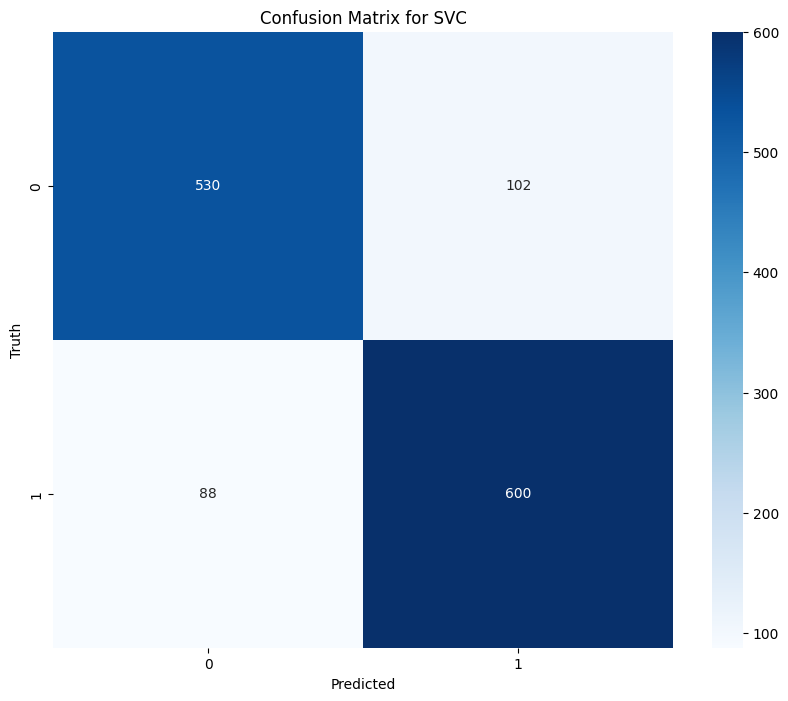

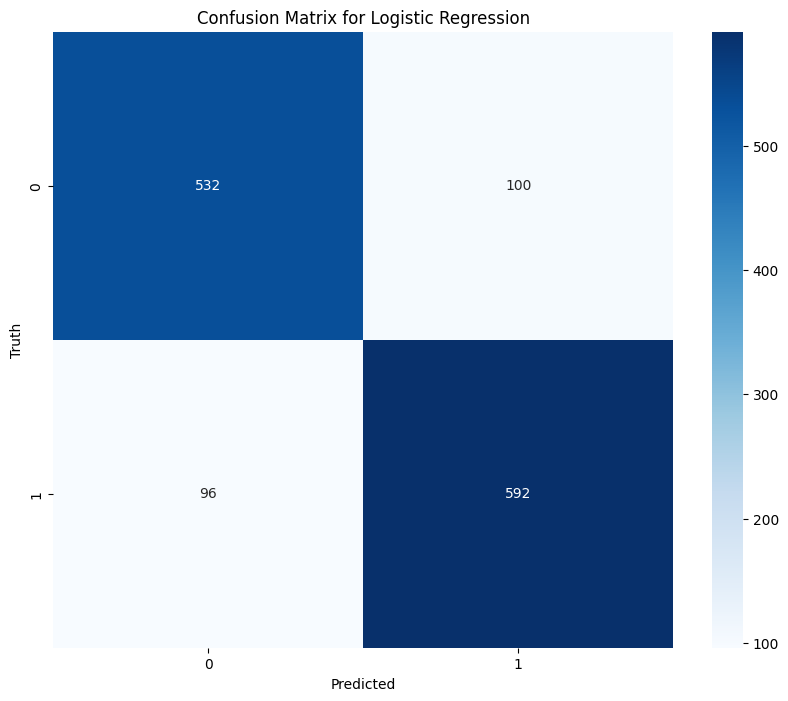

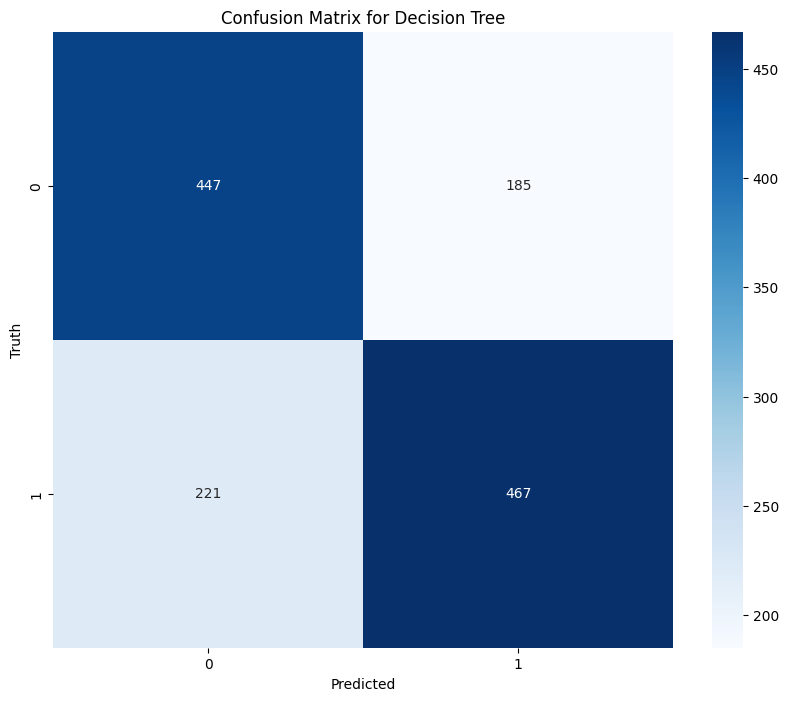

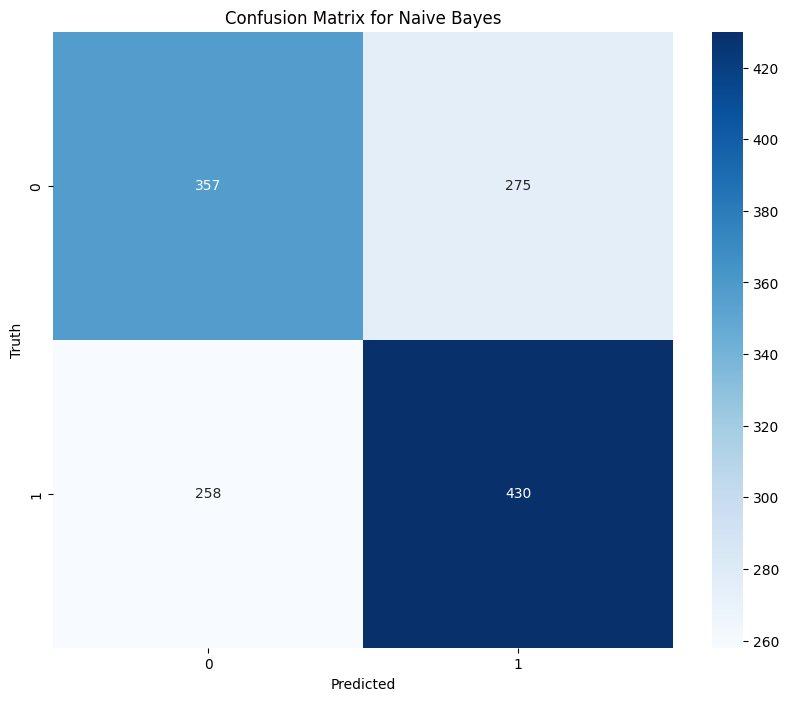

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(model, test_x_vector, test_y,model_name=None):
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix(test_y, model.predict(test_x_vector), labels=['positive', 'negative']), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()

plot_confusion_matrix(svc, test_x_vector, test_y, 'SVC')
plot_confusion_matrix(log_reg, test_x_vector, test_y, 'Logistic Regression')
plot_confusion_matrix(dt, test_x_vector, test_y, 'Decision Tree')
plot_confusion_matrix(gnb, test_x_vector.toarray(), test_y, 'Naive Bayes')
